# Expedia Hotel Recommendations

## Importing the data

# Important Columns

1. Date Time for extracting month
2. Location Country
3. IsPackage
4. Length of Stay
5. Count of Adults
6. Count of Children
7. Search Destination id
8. Search destination type id
9. Is Booking
10. Count
11. Plan time

#### 1. Importing all libraries

In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

#### 2. Importing train data and describing the data

In [2]:
train = pd.read_csv("train.csv", parse_dates=['srch_ci', 'srch_co'], nrows=10000)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
date_time                    10000 non-null object
site_name                    10000 non-null int64
posa_continent               10000 non-null int64
user_location_country        10000 non-null int64
user_location_region         10000 non-null int64
user_location_city           10000 non-null int64
orig_destination_distance    6271 non-null float64
user_id                      10000 non-null int64
is_mobile                    10000 non-null int64
is_package                   10000 non-null int64
channel                      10000 non-null int64
srch_ci                      9993 non-null datetime64[ns]
srch_co                      9993 non-null datetime64[ns]
srch_adults_cnt              10000 non-null int64
srch_children_cnt            10000 non-null int64
srch_rm_cnt                  10000 non-null int64
srch_destination_id          10000 non-null int64
srch_destination_type_id

In [13]:
train.describe()

/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,6271.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8.261400,2.744400,85.711700,272.578700,26941.592000,1833.809641,29121.770900,0.206600,0.220100,5.70210,...,0.349100,1.12780,14807.539200,2.641100,0.077700,1.456100,3.149200,80.198000,575.825700,49.120100
std,10.352004,0.590511,61.545901,178.451546,17472.051101,2028.265606,17115.773996,0.404886,0.414335,3.59959,...,0.761241,0.55308,11454.009352,2.203446,0.267712,1.167565,1.539213,55.267289,494.452768,28.705492
min,2.000000,0.000000,0.000000,0.000000,3.000000,0.065100,12.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,11.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,66.000000,172.000000,9876.000000,NaN,12950.000000,0.000000,0.000000,2.00000,...,0.000000,1.00000,8268.000000,1.000000,0.000000,1.000000,2.000000,50.000000,142.000000,25.000000
50%,2.000000,3.000000,66.000000,258.000000,25954.000000,NaN,30977.000000,0.000000,0.000000,9.00000,...,0.000000,1.00000,10970.500000,1.000000,0.000000,1.000000,2.000000,50.000000,544.000000,48.000000
75%,11.000000,3.000000,69.000000,354.000000,43175.000000,NaN,44663.000000,0.000000,0.000000,9.00000,...,0.000000,1.00000,18714.000000,5.000000,0.000000,1.000000,4.000000,105.000000,700.000000,73.000000
max,47.000000,4.000000,239.000000,1003.000000,56451.000000,11301.871400,54404.000000,1.000000,1.000000,9.00000,...,9.000000,8.00000,65035.000000,8.000000,1.000000,23.000000,6.000000,208.000000,2103.000000,99.000000


## Visualizing the data 

#### 1. Which country has the most number of hotels ?

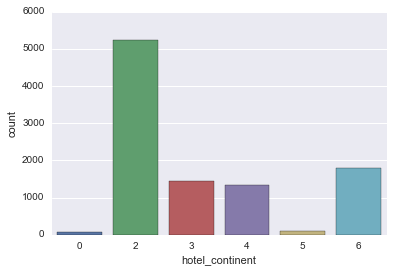

In [14]:
sns.countplot(x='hotel_continent', data=train)

In [113]:
top_ten_user_countries = train.groupby('user_location_country')['user_location_region'].count().sort_values(ascending=False)[:10]

In [114]:
user_location = pd.DataFrame(data=top_ten_user_countries, dtype=np.int64)

In [115]:
user_location_region = user_location['user_location_region']

In [116]:
user_location_country = user_location.iloc[:,1:]

In [117]:
user_location_region

user_location_country
66     5648
205    1040
3       723
23      398
46      329
69      242
231     189
133     114
70      111
209     108
Name: user_location_region, dtype: int64

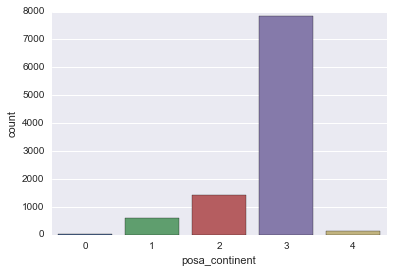

In [118]:
# most of people booking are from continent 3 I guess is one of the rich continent?
sns.countplot(x='posa_continent', data=train)

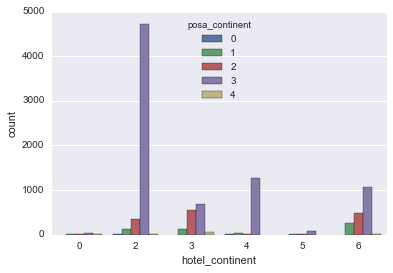

In [8]:
# putting the two above together
sns.countplot(x='hotel_continent', hue='posa_continent', data=train)

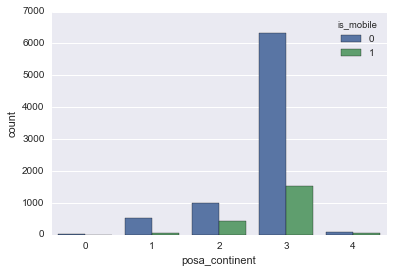

In [119]:
# how many people by continent are booking from mobile
sns.countplot(x='posa_continent', hue='is_mobile', data = train)

/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


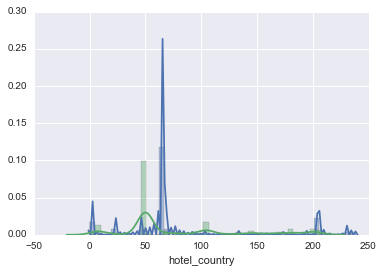

In [122]:
# Difference between user and destination country
sns.distplot(train['user_location_country'], label="User country")
sns.distplot(train['hotel_country'], label="Hotel country")

In [127]:
# get number of booked nights as difference between check in and check out

hotel_nights = train['srch_co'] - train['srch_ci'] 
hotel_nights = (hotel_nights / np.timedelta64(1, 'D')).astype(float) # convert to float to avoid NA problems
train['hotel_nights'] = hotel_nights

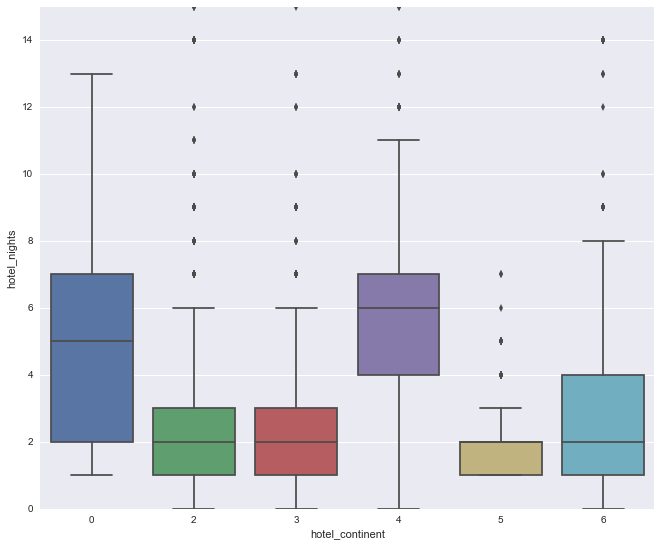

In [128]:
plt.figure(figsize=(11, 9))
ax = sns.boxplot(x='hotel_continent', y='hotel_nights', data=train)
lim = ax.set(ylim=(0, 15))

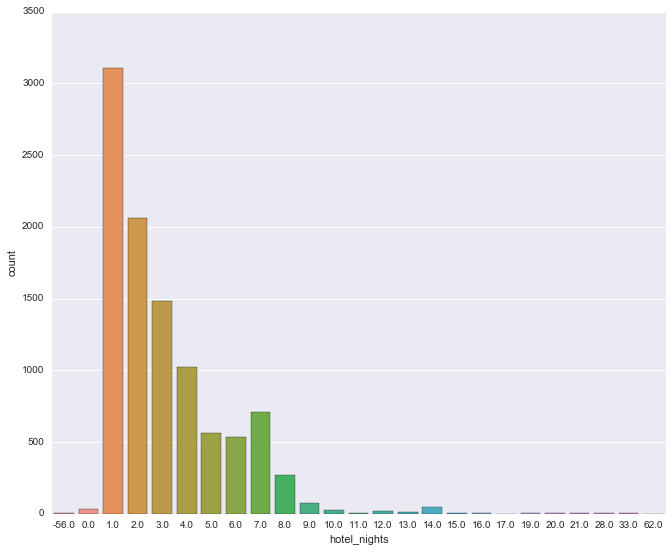

In [129]:
plt.figure(figsize=(11, 9))
sns.countplot(x="hotel_nights", data=train)

In [130]:
expedia_df = train.drop(['date_time','site_name', 'user_location_region', 'user_location_city', 'orig_destination_distance', 
                              'user_id', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'cnt'], axis=1)


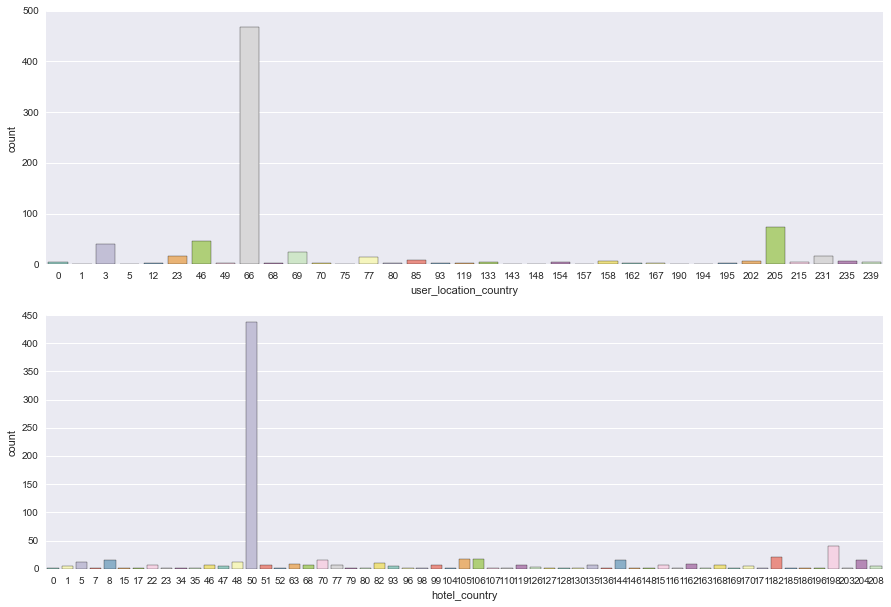

In [131]:
# Plot 

fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))

bookings_df = expedia_df[expedia_df["is_booking"] == 1]

# What are the most countries the customer travel from?
sns.countplot('user_location_country',data=bookings_df.sort_values(by=['user_location_country']),ax=axis1,palette="Set3")

# What are the most countries the customer travel to?
sns.countplot('hotel_country',data=bookings_df.sort_values(by=['hotel_country']),ax=axis2,palette="Set3")


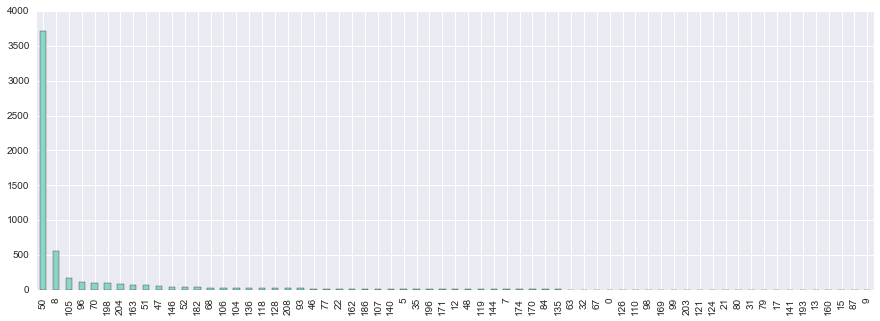

In [132]:
# Where do most of the customers from a country travel?
user_country_id = 66

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

country_customers = expedia_df[expedia_df["user_location_country"] == user_country_id]
country_customers["hotel_country"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

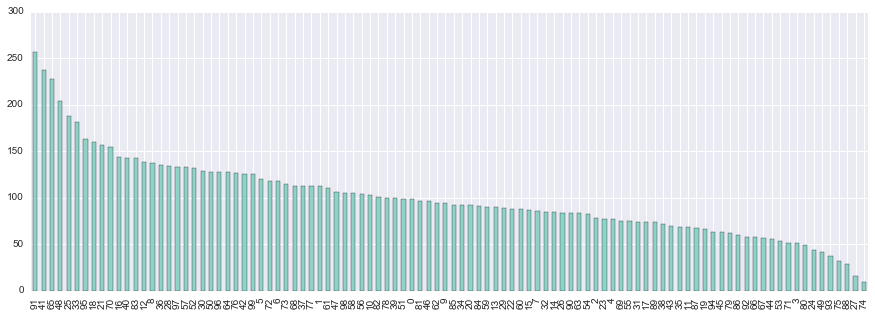

In [133]:
# Plot frequency for each hotel_clusters

expedia_df["hotel_cluster"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

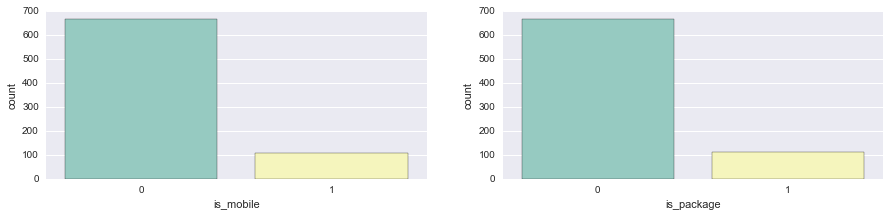

In [134]:
# Plot frequency of is_mobile & is_package

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,3))

# What's the frequency of bookings through mobile?
sns.countplot(x='is_mobile',data=bookings_df, order=[0,1], palette="Set3", ax=axis1)

# What's the frequency of bookings with package?
sns.countplot(x='is_package',data=bookings_df, order=[0,1], palette="Set3", ax=axis2)

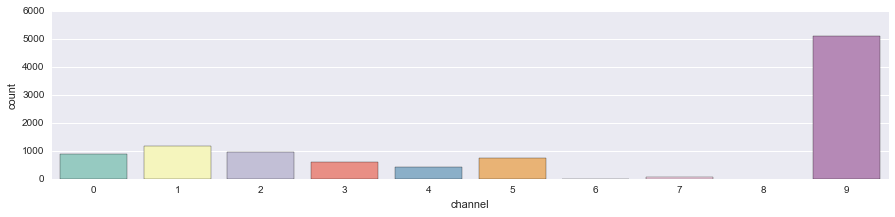

In [135]:
# What's the most impactful channel?

fig, (axis1) = plt.subplots(1,1,figsize=(15,3))

sns.countplot(x='channel', order=list(range(0,10)), data=expedia_df, palette="Set3")

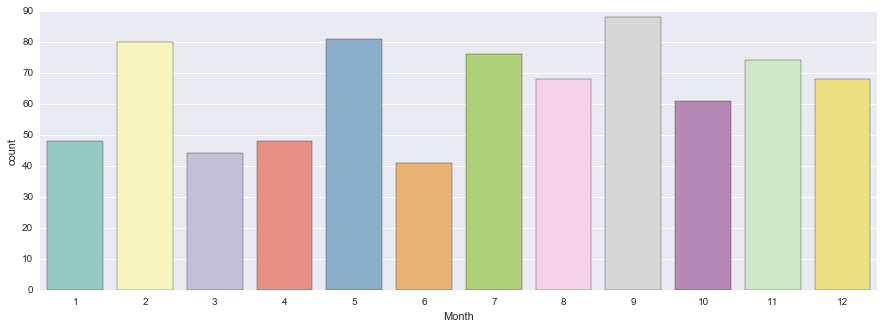

In [139]:
# Convert srch_ci to Year, Month, and Week

expedia_df['Year']   = expedia_df['srch_ci'].apply(lambda x: int(str(x)[:4]) if x == x else np.nan)
expedia_df['Month']  = expedia_df['srch_ci'].apply(lambda x: int(str(x)[5:7]) if x == x else np.nan)
expedia_df['Week']   = expedia_df['srch_ci'].apply(lambda x: int(str(x)[8:10]) if x == x else np.nan)

fig, (axis1) = plt.subplots(1,1,sharex=True,figsize=(15,5))

# Plot How many bookings in each month
sns.countplot('Month',data=expedia_df[expedia_df["is_booking"] == 1],order=list(range(1,13)),palette="Set3",ax=axis1)

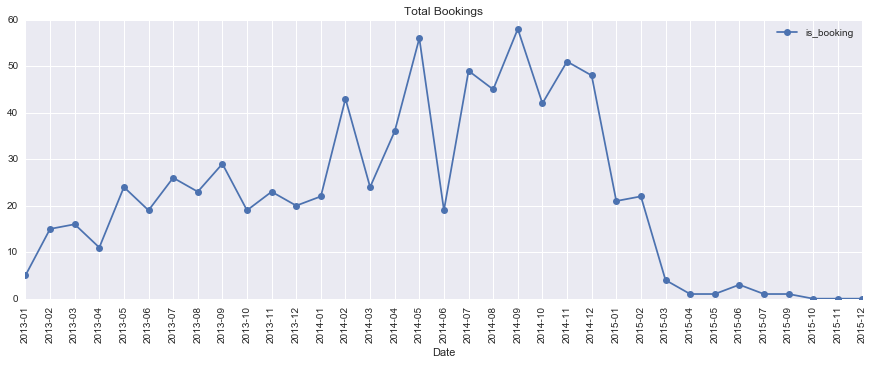

In [140]:
# Convert srch_ci column to Date(Y-M)
expedia_df['Date']  = expedia_df['srch_ci'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)

# Plot number of bookings over Date
date_bookings  = expedia_df.groupby('Date')["is_booking"].sum()
ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(15,5)) 
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)

## Cleaning the data

In [141]:
dtype={'is_booking':bool,
        'srch_ci' : np.str_,
        'srch_co' : np.str_,
        'srch_adults_cnt' : np.int32,
        'srch_children_cnt' : np.int32,
        'srch_rm_cnt' : np.int32,
        'srch_destination_id':np.str_,
        'user_location_country' : np.str_,
        'user_location_region' : np.str_,
        'user_location_city' : np.str_,
        'hotel_cluster' : np.str_,
        'orig_destination_distance':np.float64,
        'date_time':np.str_,
        'hotel_market':np.str_}

In [1012]:
dtype={'is_booking':bool,
        'srch_ci' : np.str_,
        'srch_co' : np.str_,
        'srch_adults_cnt' : np.int32,
        'srch_children_cnt' : np.int32,
        'srch_rm_cnt' : np.int32,
        'srch_destination_id':np.int32,
        'user_location_country' : np.float64,
        'user_location_region' : np.float64,
        'user_location_city' : np.float64,
        'hotel_cluster' : np.float64,
        'orig_destination_distance':np.float64,
        'date_time':np.str_,
        'hotel_market':np.int32}

In [949]:
dtype1={'srch_ci' : np.str_,
        'srch_co' : np.str_,
        'srch_adults_cnt' : np.int32,
        'srch_children_cnt' : np.int32,
        'srch_rm_cnt' : np.int32,
        'srch_destination_id':np.int32,
        'user_location_country' : np.int32,
        'user_location_region' : np.int32,
        'user_location_city' : np.int32,
        'orig_destination_distance':np.float64,
        'date_time':np.str_,
        'hotel_market':np.int32}

In [1013]:
df0 = pd.read_csv('train.csv',dtype=dtype, usecols=dtype, parse_dates=['date_time'] ,sep=',', nrows=5000000).dropna()

In [1014]:
df0 = df0[(df0['hotel_cluster'] == 91)  | (df0['hotel_cluster'] == 41)]
#| (df0['hotel_cluster'] == 65) | (df0['hotel_cluster'] == 48) | (df0['hotel_cluster'] == 25)| (df0['hotel_cluster'] == 33)| (df0['hotel_cluster'] == 95)| (df0['hotel_cluster'] == 18)| (df0['hotel_cluster'] == 21)

In [1015]:
df0['year']=df0['date_time'].dt.year

In [1016]:
test1 = df0[(df0['is_booking']== True) & (df0['year']==2014)]
train = df0[((df0['is_booking']== False) & (df0['year']==2014)) | (df0['year'] != 2014)]

In [1017]:
#test1 = pd.read_csv('test.csv',dtype=dtype, usecols=dtype1, parse_dates=['date_time'] ,sep=',', nrows=1000000).dropna()


In [1018]:
test1['year']=test1['date_time'].dt.year

/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1019]:
test1['srch_ci']=pd.to_datetime(test1['srch_ci'],infer_datetime_format = True,errors='coerce')
test1['srch_co']=pd.to_datetime(test1['srch_co'],infer_datetime_format = True,errors='coerce')

test1['month']=test1['date_time'].dt.month
test1['plan_time'] = ((test1['srch_ci']-test1['date_time'])/np.timedelta64(1,'D')).astype(float)
test1['hotel_nights']=((test1['srch_co']-test1['srch_ci'])/np.timedelta64(1,'D')).astype(float)

n=test1.orig_destination_distance.mean()
test1['orig_destination_distance']=test1.orig_destination_distance.fillna(m)
test1.fillna(-1,inplace=True)

/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [1020]:
lst_drop=['date_time','srch_ci','srch_co']
test1.drop(lst_drop,axis=1, inplace=True)

/Users/abhisheknigam/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [1021]:
final_result = test1.hotel_cluster

In [1022]:
del test1['hotel_cluster']

In [1023]:
del df0

In [1024]:
train['srch_ci']=pd.to_datetime(train['srch_ci'],infer_datetime_format = True,errors='coerce')
train['srch_co']=pd.to_datetime(train['srch_co'],infer_datetime_format = True,errors='coerce')

train['month']= train['date_time'].dt.month
train['plan_time'] = ((train['srch_ci']-train['date_time'])/np.timedelta64(1,'D')).astype(float)
train['hotel_nights']=((train['srch_co']-train['srch_ci'])/np.timedelta64(1,'D')).astype(float)

In [1025]:
m=train.orig_destination_distance.mean()
train['orig_destination_distance']=train.orig_destination_distance.fillna(m)
train.fillna(-1,inplace=True)
lst_drop=['date_time','srch_ci','srch_co']
train.drop(lst_drop,axis=1,inplace=True)

In [1026]:
y=train['hotel_cluster']
X=train.drop(['is_booking','year','hotel_market','user_location_country','user_location_region','user_location_city','srch_destination_id'],axis=1)

In [1027]:
del train

In [1028]:
test1

,user_location_country,user_location_region,user_location_city,orig_destination_distance,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,is_booking,hotel_market,year,month,plan_time,hotel_nights
372,66.0,174.0,16634.0,3.3379,2,2,1,61531,True,1241,2014,4,-0.405926,2.0
2687,66.0,174.0,26774.0,2450.9117,1,0,1,8271,True,696,2014,3,1.152222,1.0
2714,66.0,448.0,24848.0,213.4010,1,0,1,8267,True,675,2014,11,3.372847,2.0
2818,66.0,184.0,34619.0,90.4694,2,3,1,8236,True,656,2014,5,29.460729,1.0
2853,66.0,174.0,40789.0,185.0757,2,0,1,21648,True,368,2014,9,22.103206,1.0
3668,66.0,258.0,4687.0,459.9214,1,0,1,59679,True,447,2014,4,15.069560,1.0
4099,66.0,331.0,455.0,525.9236,2,0,1,8267,True,675,2014,1,20.453611,1.0
4153,66.0,174.0,21942.0,109.8043,2,1,1,8278,True,368,2014,9,-0.536944,3.0
5200,66.0,332.0,55121.0,230.8285,1,0,1,27279,True,736,2014,2,0.776551,2.0
5203,66.0,332.0,55121.0,230.8285,3,0,2,27279,True,736,2014,3,0.397523,3.0


# Naive Bayes Implementation 

In [1029]:
def separateByClass(dataset):
    separated = {}
    for i in range(len(dataset)):
        vector = dataset[i]
        if (vector[-4] not in separated):
            separated[vector[-4]] = []
        separated[vector[-4]].append(vector)
    return separated


In [1030]:
np_X = X.as_matrix()

In [1031]:
import math
def mean(numbers):
    return sum(numbers)/float(len(numbers))

def stdev(numbers):
    avg = mean(numbers)
    variance = sum([pow(x-avg,2) for x in numbers])/float(len(numbers)-1)
    return math.sqrt(variance)

In [1032]:
def summarize(dataset):
    summaries = [(mean(attribute), stdev(attribute)) for attribute in zip(*dataset)]
    del summaries[-4]
    return summaries

In [1033]:
def summarizeByClass(dataset):
    separated = separateByClass(dataset)
    summaries = {}
    for classValue, instances in separated.items():
        summaries[classValue] = summarize(instances)
    return summaries

In [1034]:
import math
def calculateProbability(x, mean, stdev):
    exponent = math.exp(-(math.pow(x-mean,2)/(2*math.pow(stdev,2))))
    return (1 / (math.sqrt(2*math.pi) * stdev)) * exponent

In [1035]:
def calculateClassProbabilities(summaries, inputVector):
    probabilities = {}
    for classValue, classSummaries in summaries.items():
        probabilities[classValue] = 1
        for i in range(len(classSummaries)):
            mean, stdev = classSummaries[i]
            x = inputVector[i]
#             if i == 7:
#                 probabilities[classValue] += (1.1*calculateProbability(x, mean, stdev))
#             if i == 8:
#                 probabilities[classValue] += (1.1*calculateProbability(x, mean, stdev))
#             if i == 8:
#                 probabilities[classValue] += (1.1*calculateProbability(x, mean, stdev))
#             else:
            probabilities[classValue] += calculateProbability(x, mean, stdev)
    return probabilities

In [1036]:
def predict(summaries, inputVector):
    probabilities = calculateClassProbabilities(summaries, inputVector)
    bestLabel, bestProb = None, -1
    for classValue, probability in probabilities.items():
        if bestLabel is None or probability > bestProb:
            bestProb = probability
            bestLabel = classValue
    return bestLabel

In [1037]:
def getPredictions(summaries, testSet):
    predictions = []
    for i in range(len(testSet)):
        result = predict(summaries, testSet[i])
        predictions.append(result)
    return predictions

In [1038]:
summaries = summarizeByClass(np_X)

In [1039]:
test1 = test1.drop(['is_booking','year','hotel_market','user_location_country','user_location_region','user_location_city','srch_destination_id'],axis=1)

In [1040]:
testSet = test1.as_matrix()

In [1041]:
predictions = getPredictions(summaries, testSet)

In [1042]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet['hotel_cluster'][x] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [1043]:
pd_final = pd.DataFrame(data=final_result, dtype=np.int64)

In [1044]:
pd_final = pd_final.reset_index()

In [1045]:
len(testSet)

12231

In [1046]:
accuracy = getAccuracy(pd_final, predictions)

In [1047]:
accuracy

28.73027552939253

In [1048]:
summaries

{41.0: [(1531.7660414879504, 1814.7533845743737),
  (2.0299355278479934, 0.8664856228198694),
  (0.31974779175778922, 0.7106932063157768),
  (1.0881308756283905, 0.3990463194455084),
  (7.0403447982050045, 3.2204558977120663),
  (49.384490876010616, 60.61587072006895),
  (3.0921639353574371, 2.78733381881572)],
 91.0: [(839.72757724401481, 1151.0671705907662),
  (2.0485063150479705, 0.968815543924024),
  (0.47862408349951879, 0.891714769175732),
  (1.1200504013255153, 0.5080695206379323),
  (7.0975781567798713, 3.2104838044806816),
  (33.90415637756746, 51.17559191887663),
  (2.3664513696659424, 2.4007062299317172)]}

In [1049]:
predictions

[41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 91.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 91.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 91.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 91.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 91.0,
 41.0,
 41.0,
 41.0,
 41.0,
 91.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 91.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,
 41.0,

In [1050]:
X

,orig_destination_distance,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,hotel_cluster,month,plan_time,hotel_nights
105,2104.9654,3,0,1,91.0,8,21.177234,1.0
369,3.3379,2,0,1,91.0,4,-0.693819,3.0
370,3.3379,2,2,1,91.0,4,-0.694132,3.0
371,3.3379,2,2,1,91.0,4,-0.385949,2.0
771,5768.0730,2,2,1,91.0,11,271.549525,3.0
775,5761.2438,2,2,1,91.0,11,270.532326,3.0
776,5761.2438,2,2,1,91.0,11,270.531146,3.0
1183,2010.5704,2,0,1,91.0,10,143.762141,7.0
1197,2010.5704,2,0,1,91.0,11,109.718125,7.0
1318,174.8678,4,0,2,41.0,9,14.411227,2.0
